<a href="https://colab.research.google.com/github/erestrepol/Business-Intelligence/blob/main/Reto_3_Heart_ERL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

,Age,Systolic,Diastolic,BMI,Disease
0,44,112,111,17,0
1,55,128,90,27,1
2,47,131,94,26,1
3,31,151,104,17,0
4,65,148,117,17,1
...,...,...,...,...,...
175,43,119,76,25,0
176,63,107,113,40,1
177,47,116,61,27,0
178,70,110,88,24,0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

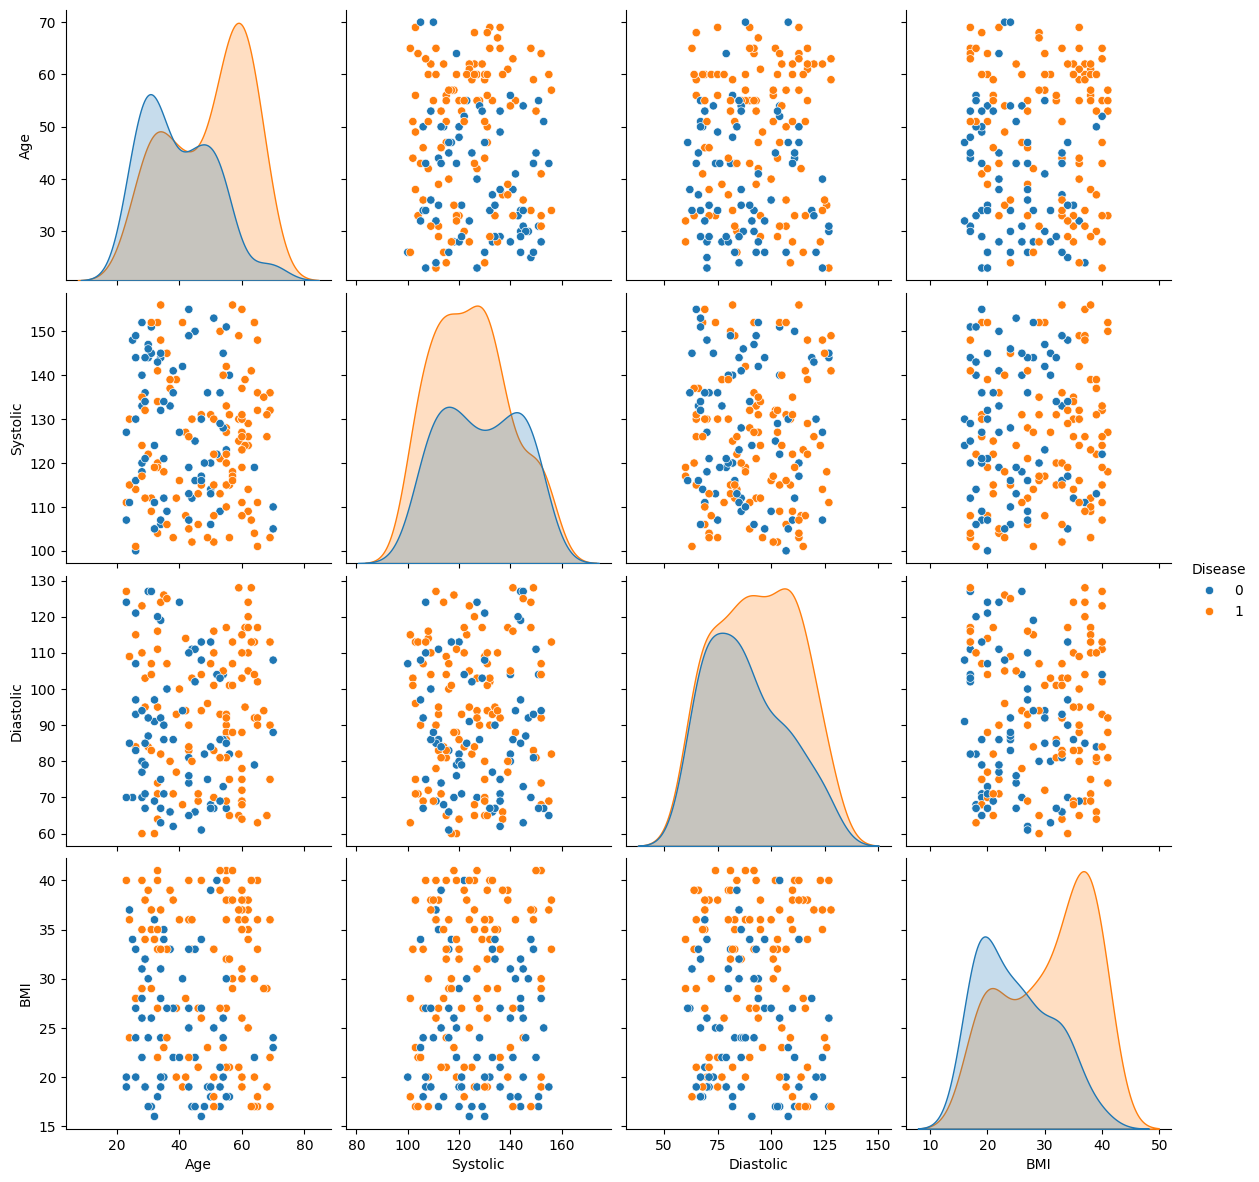

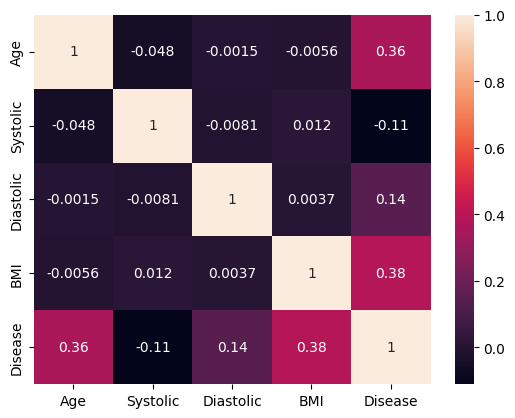

In [ ]:
nxl='/content/drive/MyDrive/3. BD2-HeartData_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['Age','Systolic','Diastolic','BMI', 'Disease']]
XDB.dropna()
display(XDB)

#Para mirar correlaciones y variables importantes
plt.figure()
sns.pairplot(XDB, hue='Disease',size=3,vars=['Age','Systolic','Diastolic','BMI'])
plt.show()

#¿Y cuales son las correlaciones?
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()


2. Se procede con la implementación del modelo de clusterización



In [ ]:
XD=XDB[['Age','Systolic','Diastolic','BMI']]
yd=XDB['Disease']

#Se van a crear cinco montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n",centroids)

# Mostrar los centroides sin notación científica
np.set_printoptions(suppress=True)
print("Los centroides son:\n", centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece una persona enferma
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
Nenf=XDB.groupby('labels').agg({"Disease":lambda x:(x==1).sum()})
NNenf=XDB.groupby('labels').agg({"Disease":lambda x:(x==0).sum()})
print("El numero de cardiacos por cluster es:\n",Nenf)
print("El numero de cardiacos por cluster es:\n",NNenf)


#Se procede con la estimación de los porcentajes de enfermedad
Nenf['Disease']=Nenf['Disease']/ND
NNenf['Disease']=NNenf['Disease']/ND
print("El porcentaje de enfermos por cluster es:\n",Nenf)
print("El porcentaje de enfermos por cluster es:\n",NNenf)



Los centroides son:
 [[ 39.36111111 113.30555556  74.5         26.63888889]
 [ 57.90697674 126.74418605  84.37209302  30.34883721]
 [ 44.68965517 139.93103448 114.75862069  26.55172414]
 [ 37.35294118 143.76470588  77.76470588  28.91176471]
 [ 44.63157895 111.76315789 109.36842105  28.76315789]]
Los centroides son:
 [[ 39.36111111 113.30555556  74.5         26.63888889]
 [ 57.90697674 126.74418605  84.37209302  30.34883721]
 [ 44.68965517 139.93103448 114.75862069  26.55172414]
 [ 37.35294118 143.76470588  77.76470588  28.91176471]
 [ 44.63157895 111.76315789 109.36842105  28.76315789]]


,Age,Systolic,Diastolic,BMI,Disease,labels
0,44,112,111,17,0,4
1,55,128,90,27,1,1
2,47,131,94,26,1,1
3,31,151,104,17,0,2
4,65,148,117,17,1,2
...,...,...,...,...,...,...
175,43,119,76,25,0,0
176,63,107,113,40,1,4
177,47,116,61,27,0,0
178,70,110,88,24,0,1


El tamaño de los clusters es:
 [36 43 29 34 38]
El numero de cardiacos por cluster es:
         Disease
labels         
0            16
1            36
2            18
3            10
4            27
El numero de cardiacos por cluster es:
         Disease
labels         
0            20
1             7
2            11
3            24
4            11
El porcentaje de enfermos por cluster es:
          Disease
labels          
0       0.444444
1       0.837209
2       0.620690
3       0.294118
4       0.710526
El porcentaje de enfermos por cluster es:
          Disease
labels          
0       0.555556
1       0.162791
2       0.379310
3       0.705882
4       0.289474


3. Se procede a evaluar el modelo

In [ ]:
ydp = np.zeros((len(XD), 1))  # Inicializamos un arreglo de ceros

Venf = np.array(Nenf)  # Convertimos Nenf en un array de NumPy
Vnenf = np.array(NNenf)  # Convertimos NNenf en un array de NumPy

for k in range(len(XD)):
    napr = labels[k]  # Obtenemos la etiqueta del clúster para la persona k

    print("La persona número:", k)
    print("El clúster al que pertenece es:", napr)  # Imprimimos la etiqueta del clúster
    print("El porcentaje de Aprobación es:\n", Venf[napr])  # Accedemos a Venf usando la etiqueta del clúster
    print("El porcentaje de Rechazo es:\n", Vnenf[napr])  # Accedemos a Vnenf usando la etiqueta del clúster

    # Consolidamos la información de los Aprobados y Negados
    if Venf[napr] > Vnenf[napr]:  # Comparamos los valores para el clúster actual
        ydp[k] = 1  # Asignamos 1 si el porcentaje de aprobación es mayor
    else:
        ydp[k] = 0  # Asignamos 0 si el porcentaje de rechazo es mayor



La persona número: 0
El clúster al que pertenece es: 4
El porcentaje de Aprobación es:
 [0.71052632]
El porcentaje de Rechazo es:
 [0.28947368]
La persona número: 1
El clúster al que pertenece es: 1
El porcentaje de Aprobación es:
 [0.8372093]
El porcentaje de Rechazo es:
 [0.1627907]
La persona número: 2
El clúster al que pertenece es: 1
El porcentaje de Aprobación es:
 [0.8372093]
El porcentaje de Rechazo es:
 [0.1627907]
La persona número: 3
El clúster al que pertenece es: 2
El porcentaje de Aprobación es:
 [0.62068966]
El porcentaje de Rechazo es:
 [0.37931034]
La persona número: 4
El clúster al que pertenece es: 2
El porcentaje de Aprobación es:
 [0.62068966]
El porcentaje de Rechazo es:
 [0.37931034]
La persona número: 5
El clúster al que pertenece es: 3
El porcentaje de Aprobación es:
 [0.29411765]
El porcentaje de Rechazo es:
 [0.70588235]
La persona número: 6
El clúster al que pertenece es: 1
El porcentaje de Aprobación es:
 [0.8372093]
El porcentaje de Rechazo es:
 [0.1627907

4. Matriz de confusión

In [ ]:
#Se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FP)
print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)
print("La precisión es:",Precision)
print("El error es:",TasaError)
print("La tasa de falsos positivos es:",PredNeg)

La matriz de confusión es:
 [[44 29]
 [26 81]]
La exactitud es: 0.6944444444444444
La sensibilidad es: 0.7570093457943925
La especificidad es: 0.6027397260273972
La precisión es: 0.7363636363636363
El error es: 0.3055555555555556
La tasa de falsos positivos es: 0.6027397260273972


5.Determinar el número de individuos que desarrollarán una enfermedad cardiaca acuerdo con la estructura de cada uno de los clusters, indicando cual es el cluster que presenta la mayor edad, la mayor presión sistólica, la menor presión diastólica, y el menor índice de masa corporal.

In [ ]:
# Número de individuos que desarrollarán una enfermedad cardíaca por cluster
enfermedades_por_cluster = XDB.groupby('labels')['Disease'].sum()
print("Número de individuos que desarrollarán una enfermedad cardíaca por cluster:\n", enfermedades_por_cluster)

# Cluster con la mayor edad
cluster_mayor_edad = XDB.groupby('labels')['Age'].mean().idxmax()
print("\nCluster con la mayor edad:", cluster_mayor_edad)

# Cluster con la mayor presión sistólica
cluster_mayor_sistolica = XDB.groupby('labels')['Systolic'].mean().idxmax()
print("Cluster con la mayor presión sistólica:", cluster_mayor_sistolica)

# Cluster con la menor presión diastólica
cluster_menor_diastolica = XDB.groupby('labels')['Diastolic'].mean().idxmin()
print("Cluster con la menor presión diastólica:", cluster_menor_diastolica)

# Cluster con el menor índice de masa corporal
cluster_menor_bmi = XDB.groupby('labels')['BMI'].mean().idxmin()
print("Cluster con el menor índice de masa corporal:", cluster_menor_bmi)

# Cluster con la mayor edad (ya calculado previamente)
cluster_mayor_edad = XDB.groupby('labels')['Age'].mean().idxmax()

# Filtrar los datos para el cluster con la mayor edad
datos_cluster_mayor_edad = XDB[XDB['labels'] == cluster_mayor_edad]

# Filtrar los datos para el cluster con la mayor edad
datos_cluster_menor_BMI = XDB[XDB['labels'] == cluster_mayor_edad]

# Obtener la mayor edad, mayor presión sistólica y menor presión diastólica
mayor_edad = datos_cluster_mayor_edad['Age'].max()
mayor_sistolica = datos_cluster_mayor_edad['Systolic'].max()
menor_diastolica = datos_cluster_mayor_edad['Diastolic'].min()
menor_BMI = datos_cluster_menor_BMI['BMI'].min()

print(f"En el cluster {cluster_mayor_edad}:")
print(f"Mayor edad: {mayor_edad}")
print(f"Mayor presión sistólica: {mayor_sistolica}")
print(f"Menor presión diastólica: {menor_diastolica}")
print(f"Menor BMI: {menor_BMI}")

Número de individuos que desarrollarán una enfermedad cardíaca por cluster:
 labels
0    16
1    36
2    18
3    10
4    27
Name: Disease, dtype: int64

Cluster con la mayor edad: 1
Cluster con la mayor presión sistólica: 3
Cluster con la menor presión diastólica: 0
Cluster con el menor índice de masa corporal: 2
En el cluster 1:
Mayor edad: 70
Mayor presión sistólica: 152
Menor presión diastólica: 64
Menor BMI: 18


6. Determinar si una persona con las siguientes características, va a desarrollar una enfermedad cardiaca utilizando el modelo K-Means y graficar

la persona pertenece al cluster: [3]
El porcentaje de enfermos por cluster es:
          Disease
labels          
0       0.444444
1       0.837209
2       0.620690
3       0.294118
4       0.710526
El porcentaje de enfermos por cluster es:
          Disease
labels          
0       0.555556
1       0.162791
2       0.379310
3       0.705882
4       0.289474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


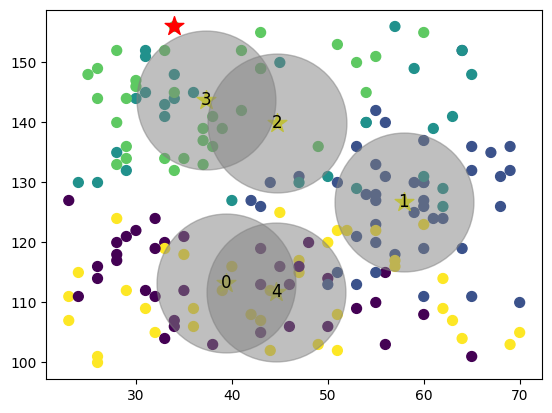

In [ ]:
XD1=np.array([(34,156,82,33)])

ydn=mkm.predict(XD1)
print("la persona pertenece al cluster:",mkm.predict(XD1))
print("El porcentaje de enfermos por cluster es:\n",Nenf)
print("El porcentaje de enfermos por cluster es:\n",NNenf)

XD=np.array(XD)
plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XD1[:,0],XD1[:,1],marker='*',s=200,facecolors='red')
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,facecolors='yellow')
plt.scatter(centroids[:,0],centroids[:,1],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i, c in enumerate (centroids):
  plt.text(c[0],c[1],str(i),fontsize=12,color='black',ha='center',va='center')


**Analisis de Resultados**

Para la clasificación de datos mediante el método de clusterización (K-Means), se tomaron un total de 4 variables clínicas (Age, Systolic, Diastolic, BMI), además de una variable explicativa determinada por la presencia de enfermedad. Se definieron 5 clústers con el objetivo de agrupar los datos en categorías de riesgo según las características de los pacientes.
El análisis de correlación en términos de valor absoluto muestra que la variable con mayor relación con la enfermedad es BMI, con un coeficiente de 0.38, seguida de Age con 0.36 y Diastolic con 0.14. Esto indica que el índice de masa corporal y la edad son los principales factores asociados a la presencia de enfermedad cardiovascular, mientras que la presión diastólica tiene una relación menor. Por otro lado, Systolic presenta la menor correlación con la enfermedad con un valor absoluto de 0.11, lo que indica que tiene poca influencia en la clasificación de pacientes.
En cuanto a los resultados de la clusterización, se identificó que el Cluster 1 es el grupo con mayor proporción de enfermos, con un 83.7% de los pacientes diagnosticados con la enfermedad, seguido del Cluster 4 con un 71.1%.

A su vez, el Cluster 3 es el que presenta la menor proporción de enfermos, con solo un 29.4%, lo que sugiere que los individuos en este grupo tienen menores factores de riesgo. En términos de desempeño del modelo, la matriz de confusión indica que la exactitud general alcanzada fue del 69.44%, lo que refleja un desempeño aceptable en la clasificación. La sensibilidad alcanzó un 75.7%, lo que indica una buena capacidad del modelo para identificar correctamente a los pacientes enfermos. No obstante, la especificidad fue de 60.27%, mostrando una mayor tendencia del modelo a clasificar a los individuos como enfermos. La precisión obtenida fue de 73.64%, mientras que la tasa de error se ubicó en 30.55%. En general, el modelo presenta un buen desempeño, aunque tiende a sobreestimar la presencia de la enfermedad, lo que se refleja en la alta tasa de falsos positivos (60.27%), este comportamiento sugiere que el modelo puede ser útil para la detección temprana de posibles casos.

